In [1]:
library(ggplot2)
library(patchwork)
library(reshape2)

In [2]:
source('../tools.R')
source('../FLAG.R')

In [3]:
data.all = read.csv('data.csv', head=T)#[,-1]
rownames(data.all) = data.all[,1]
data.all = data.all[,-1]
data.all

,CHTR,CMCSA,DIS,GOOG,META,NFLX,T,TMUS,VZ,AMZN,⋯,TXN,V,DD,LIN,AMT,SPG,DUK,EXC,NEE,SO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-03,0.011567074,-0.0162006939,0.0042840703,0.0162799160,0.0177556634,0.0196007242,-0.0233637249,-0.0067372021,-0.0207631178,0.0126943945,⋯,0.026730586,0.0099062408,0.0158676944,0.0083524090,0.0038893823,-0.0046505473,-0.0031287176,-0.0134776272,-0.0214415688,-0.005740436
2018-01-04,-0.009220037,0.0064133957,-0.0004452461,0.0036147571,-0.0018427991,0.0028245944,0.0092533924,-0.0096359739,0.0032372119,0.0044660253,⋯,-0.001292048,0.0037112614,0.0189838479,0.0155607598,-0.0147180013,-0.0296869340,-0.0078651727,-0.0141810407,-0.0051515675,-0.004273570
2018-01-05,0.003111300,0.0090563583,-0.0054501907,0.0144659243,0.0135785492,0.0209814756,0.0036773142,0.0250796608,-0.0022842174,0.0160332936,⋯,0.007635728,0.0236667405,0.0129443593,0.0087134954,0.0064254890,0.0092604841,-0.0046267003,-0.0083440112,0.0045584999,0.001711761
2018-01-08,0.016030150,-0.0137389921,-0.0144380729,0.0042640574,0.0076240215,0.0097621736,0.0028798331,0.0077101386,-0.0017161362,0.0143216329,⋯,0.004753755,0.0040300684,-0.0034532149,-0.0003717987,0.0106190905,0.0065208239,0.0031679840,0.0106783783,0.0082059682,0.008938164
2018-01-09,-0.005032916,0.0032063462,-0.0007273727,-0.0006145020,-0.0021800018,-0.0130057154,-0.0026106428,0.0076511469,-0.0036746058,0.0046648124,⋯,0.006817397,-0.0019289268,0.0023923061,0.0096855408,-0.0067829144,-0.0222247719,-0.0117477731,-0.0114643826,-0.0073495893,-0.012578849
2018-01-10,-0.011139795,0.0117503424,-0.0042842920,-0.0033048409,-0.0001596911,0.0152197267,-0.0234796383,-0.0264128276,0.0015484577,0.0013003597,⋯,-0.006270152,-0.0010919025,-0.0152473804,-0.0015973738,-0.0246909956,-0.0033281335,-0.0140068052,-0.0055184061,-0.0082664136,-0.014043877
2018-01-11,0.012576295,0.0360894016,0.0137896663,0.0026357192,-0.0003726848,0.0219666368,-0.0038303050,-0.0007828895,0.0080926389,0.0176613978,⋯,0.008803358,0.0072019242,0.0136530412,0.0072910549,-0.0193708604,-0.0009096582,-0.0104147432,0.0120483637,-0.0005974961,-0.015568643
2018-01-12,-0.003581120,-0.0037628750,0.0132464191,0.0150286606,-0.0457671480,0.0182001066,0.0114474851,-0.0025094092,-0.0048090665,0.0220933659,⋯,0.018354136,0.0020837808,0.0025229893,0.0020732441,-0.0147033940,0.0041168435,-0.0048046555,-0.0005208238,-0.0011969677,-0.009102098
2018-01-16,-0.003027197,-0.0147168583,-0.0159530636,-0.0004455880,-0.0054785230,0.0013551500,-0.0048901880,-0.0112121044,-0.0038639745,-0.0002606211,⋯,0.001772627,0.0024951063,-0.0061188653,-0.0125670287,0.0195813384,-0.0028437565,-0.0061023973,0.0020815881,0.0014623275,-0.004022397


### run with data in rolling window

In [4]:
month.list = c('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
               '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
               '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
              '01', '02', '03', '04', '05', '06', '07')
year.start = c(rep('2018', 12), rep('2019', 12), rep('2020', 12), rep('2021', 7))
year.end = c(rep('2019', 12), rep('2020', 12), rep('2021', 12), rep('2022', 7))

In [5]:
amount = length(month.list)
om.list = list()
for(a in 1:amount){
  start = paste(year.start[a],'-',month.list[a],'-01', sep='')
  end = paste(year.end[a],'-',month.list[a],'-01', sep='')
#   cat(start, end, '\n')
  data.roll = data.all[rownames(data.all)>=start & rownames(data.all)<end,]
#   print(nrow(data.roll))
  om = OurMethod(as.matrix(data.roll))
  om.list[[a]] = om
}
save(
  'om.list',
  file='om_list.RData'
)

In [6]:
# om.all = OurMethod(as.matrix(data.all))

In [8]:
# om = om.all
# pc = prec2pc(om$precision.est)
# weights = pc*om$edge.fdr
# degree = colSums(weights)
# #   cat(mean(degree), mean(colSums(abs(weights))), '\n')
# all.strength = mean(degree)
# all.strength.abs = mean(colSums(abs(weights)))
# all.strength
# all.strength.abs
# sum(om$edge.fdr)/2

In [9]:
# other methods:
clime.list = list()
fastggm.list = list()
bggm.list = list()
glasso.list = list()
for(a in 1:amount){
  start = paste(year.start[a],'-',month.list[a],'-01', sep='')
  end = paste(year.end[a],'-',month.list[a],'-01', sep='')
  data.roll = data.all[rownames(data.all)>=start & rownames(data.all)<end,]

  clime = run.clime(as.matrix(data.roll))
  clime.list[[a]] = clime
  fastggm = FastGGM::FastGGM(as.matrix(data.roll))
  fastggm.list[[a]] = fastggm
  bggm = run.bggm(as.matrix(data.roll))
  bggm.list[[a]] = bggm
  glasso = run.glasso(as.matrix(data.roll))
  glasso.list[[a]] = glasso
}

Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Some columns do not reach the required lambda!
 You may want to increase lambda.min or use a larger nlambda. 


Registered S3 methods overwritten by 'BFpack':
  method               from
  get_estimates.lm     bain
  get_estimates.t_test bain

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



  |======================================================================| 100%Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Some columns do not reach the required lambda!
 You may want to increase lambda.min or use a larger nlambda. 
  |======================================================================| 100%Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Some columns do not reach the required lambda!
 You may want to increase lambda.min or use a larger nlambda. 
  |======================================================================| 100%Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Some columns do not reach the required lambda!
 You may want to increase lambda.min or use a larger nlambda. 
  |======================================================================| 100%Allocating memory 
start recovering 
preparing precision and path matrix list 
Done! 
Some colum

### Network analysis of our method

In [20]:
fdr.thr = 0.15

In [54]:
get.strength<-function(weights, abs=FALSE){
  degree = colSums(weights)
  if(abs) return(mean(colSums(abs(weights)))) 
  return(mean(degree)) 
}

get.cluster<-function(edge, local.prt=FALSE){
  V = nrow(edge) # number of nodes
  local.list = c()
  for(v in 1:V){
    neighbor = which(edge[,v]==1)
    neighbor.num = length(neighbor)
    if(neighbor.num==0 | neighbor.num==1){
      local=0
    }
    else{
      neighbor.adj = edge[neighbor, neighbor]
      local =sum(neighbor.adj) / (neighbor.num * (neighbor.num-1))
    }
    local.list = c(local.list, local)
  }
  if(local.prt==FALSE) return(mean(local.list))
  list(local=local.list, global=mean(local.list))
}

get.rho.abs.avg<-function(weights){
  mean(abs(weights)[which(weights!=0)])
}

get.stability<-function(edge, weights){
  strength = get.strength(weights, abs=TRUE)
  N = nrow(edge)
  stability = sqrt(sum(edge)/(N-1))*strength
  stability
}

In [22]:
amount = length(month.list)
df.om = NULL
for(a in 1:amount){
  end = paste(year.end[a],'-',month.list[a], sep='')
  om = om.list[[a]]
  om.pc = prec2pc(om$precision.est)
  om.edge = get.fdr(om$precision.pval, thr=fdr.thr)
  om.weights = om.pc * om.edge
  
  df.om0 = data.frame(time=end, strength=get.strength(om.weights), strength.abs = get.strength(om.weights, abs=TRUE),
                      clustering=get.cluster(om$edge.fdr), stability = get.stability(om.edge, om.weights))
  df.om = rbind(df.om, df.om0)
}

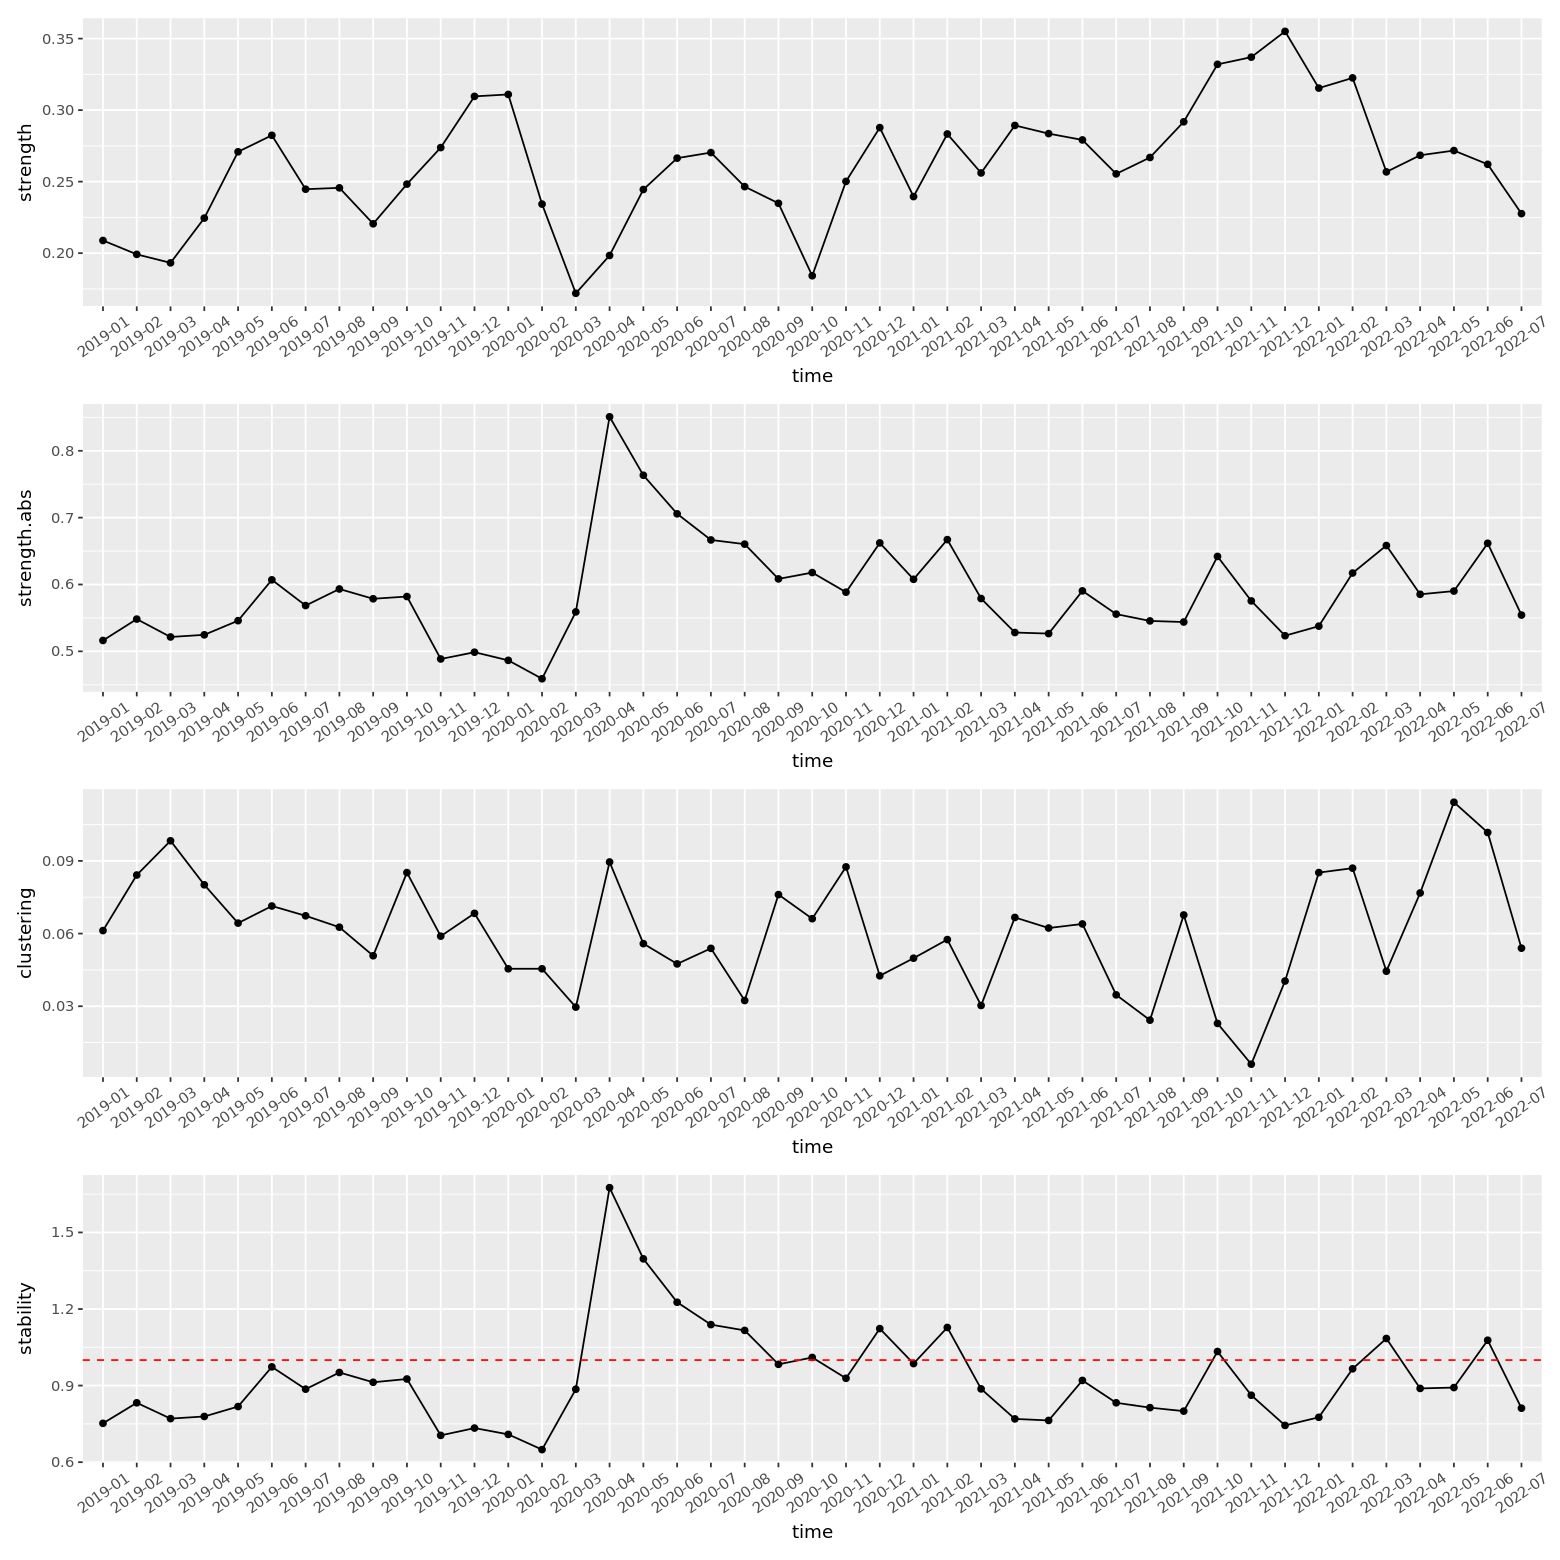

In [59]:
options(repr.plot.width=13, repr.plot.height=13)
ggplot(data=df.om, aes(x=time, y=strength, group=1)) + geom_line()+ geom_point()+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5)) +
ggplot(data=df.om, aes(x=time, y=strength.abs, group=1)) + geom_line()+ geom_point()+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5)) +
ggplot(data=df.om, aes(x=time, y=clustering, group=1)) + geom_line()+ geom_point()+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5)) +
ggplot(data=df.om, aes(x=time, y=stability, group=1)) + geom_line()+ geom_point()+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5)) +
  geom_hline(aes(yintercept=1),color='red',linetype='dashed') +
plot_layout(nrow = 4)

In [199]:
stability.fdr = NULL
fdr.list = c(0.05, 0.1, 0.15, 0.2)
df.om.stability = NULL
df.fastggm.stability = NULL
for(a in 1:amount){
  end = paste(year.end[a],'-',month.list[a], sep='')
  om = om.list[[a]]
  om.pc = prec2pc(om$precision.est)
  fastggm = fastggm.list[[a]]
  fastggm.pc = prec2pc(fastggm$precision)
  
  stability.om = c()
  stability.fastggm = c()
  for(fdr.thr in fdr.list){
    om.edge = get.fdr(om$precision.pval, thr=fdr.thr)
    om.weights = om.pc * om.edge
    fastggm.edge = get.fdr(fastggm$p_precision, thr=fdr.thr)
    fastggm.weights = fastggm.pc * fastggm.edge
    
    stability.om = c(stability.om, sqrt(get.stability(om.edge,om.weights)))
    stability.fastggm = c(stability.fastggm, sqrt(get.stability(fastggm.edge,fastggm.weights)))
  }
  df.om.stability0 = data.frame(time=end, fdr0.05=stability.om[[1]], fdr0.1=stability.om[[2]],
                                fdr0.15=stability.om[[3]], fdr0.2=stability.om[[4]])
  df.om.stability = rbind(df.om.stability, df.om.stability0)
  df.fastggm.stability0 = data.frame(time=end, fdr0.05=stability.fastggm[[1]], fdr0.1=stability.fastggm[[2]],
                                fdr0.15=stability.fastggm[[3]], fdr0.2=stability.fastggm[[4]])
  df.fastggm.stability = rbind(df.fastggm.stability, df.fastggm.stability0)
}
# df.om.stability$stability.sqrt = sqrt(df.om.stability$stability)
# df.fastggm.stability$stability.sqrt = sqrt(df.fastggm.stability$stability)

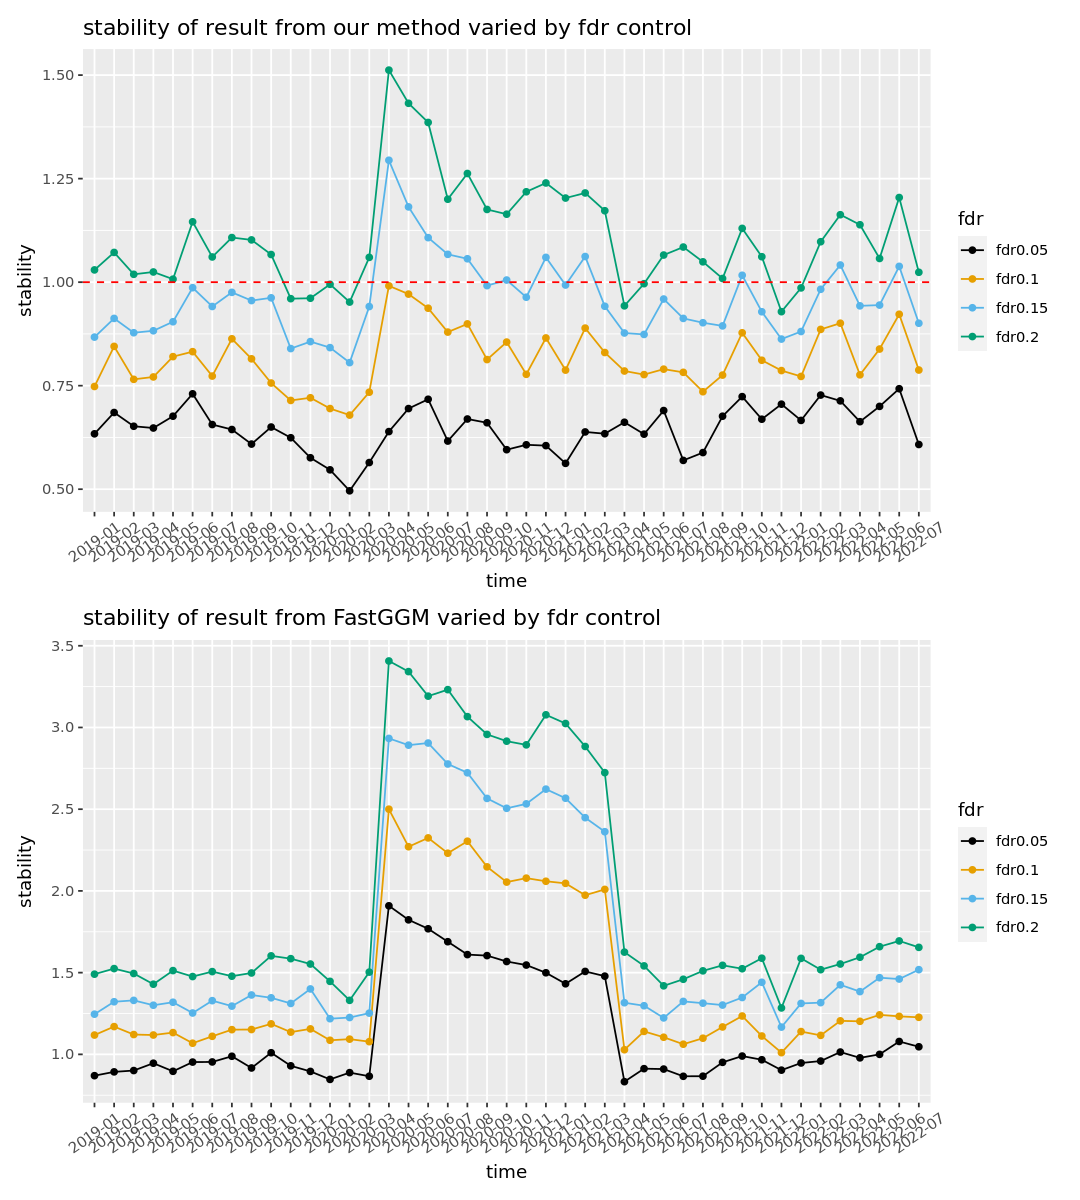

In [200]:
df.om.stability = melt(df.om.stability, id='time', variable.name='fdr', value.name ='stability')
df.fastggm.stability = melt(df.fastggm.stability, id='time', variable.name='fdr', value.name ='stability')
# df.om.stability = melt(df.om.stability, id='time', variable.name='fdr', value.name ='stability.sqrt')
# df.fastggm.stability = melt(df.fastggm.stability, id='time', variable.name='fdr', value.name ='stability.sqrt')

options(repr.plot.width=9, repr.plot.height=10)
ggplot(data=df.om.stability, aes(x=time, y=stability, group=fdr, color=fdr)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#CC79A7"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5)) +
  ggtitle('stability of result from our method varied by fdr control') +
  geom_hline(aes(yintercept=1),color='red',linetype='dashed') +
ggplot(data=df.fastggm.stability, aes(x=time, y=stability, group=fdr, color=fdr)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#CC79A7"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5)) +
  ggtitle('stability of result from FastGGM varied by fdr control') + plot_layout(nrow = 2)

### network analysis compared with other methods

In [228]:
amount = length(month.list)
df.strength = NULL
df.strength.abs = NULL
df.edge = NULL
df.rho.abs.avg = NULL
df.cluster = NULL
df.stability = NULL
fdr.thr=0.15
for(a in 1:amount){
  end = paste(year.end[a],'-',month.list[a], sep='')

  om = om.list[[a]]
  om.pc = prec2pc(om$precision.est)
  om.edge = get.fdr(om$precision.pval, thr=fdr.thr)
  om.weights = om.pc * om.edge
#   om.weights = om.pc
  
  fastggm = fastggm.list[[a]]
  fastggm.pc = prec2pc(fastggm$precision)
  fastggm.edge = get.fdr(fastggm$p_precision, thr=fdr.thr)
  fastggm.weights = fastggm.pc * fastggm.edge
#   fastggm.weights = fastggm.pc
  
  bggm.weights = bggm.list[[a]]$edge
  bggm.edge = get.adj(bggm.weights)
  
  clime = clime.list[[a]]
  clime.weights = prec2pc(clime$icov)
  clime.edge = get.adj(clime$icov)
  
  glasso = glasso.list[[a]]
  glasso.edge = get.adj(glasso$wi)
  glasso.weights = prec2pc(glasso$wi)
  
  df.strength0 = data.frame(time=end, FLAG=get.strength(om.weights),
                    ANT=get.strength(fastggm.weights), BGGM=get.strength(bggm.weights),
                    CLIME=get.strength(clime.weights),GLASSO=get.strength(glasso.weights))
  df.strength = rbind(df.strength, df.strength0)
  
  df.strength.abs0 = data.frame(time=end, FLAG=get.strength(om.weights, abs=TRUE),
                    ANT=get.strength(fastggm.weights, abs=TRUE),BGGM=get.strength(bggm.weights, abs=TRUE),
                    CLIME=get.strength(clime.weights, abs=TRUE),GLASSO=get.strength(glasso.weights, abs=TRUE))
  df.strength.abs = rbind(df.strength.abs, df.strength.abs0)
  
  df.edge = rbind(df.edge, data.frame(time=end,FLAG=sum(om.edge)/2,ANT=sum(fastggm.edge)/2,
                                      BGGM=sum(bggm.edge)/2,CLIME=sum(clime.edge)/2))
  
  df.rho.abs.avg0 = data.frame(time=end, FLAG=get.rho.abs.avg(om.weights),
                    ANT=get.rho.abs.avg(fastggm.weights), BGGM=get.rho.abs.avg(bggm.weights),
                    CLIME=get.rho.abs.avg(clime.weights),GLASSO=get.rho.abs.avg(glasso.weights))
  df.rho.abs.avg = rbind(df.rho.abs.avg, df.rho.abs.avg0)
  
  df.cluster0 = data.frame(time=end, FLAG=get.cluster(om.edge),
                    ANT=get.cluster(fastggm.edge), BGGM=get.cluster(bggm.edge),
                    CLIME=get.cluster(clime.edge),GLASSO=get.cluster(glasso.edge))
  df.cluster = rbind(df.cluster, df.cluster0)
  
  df.stability0 = data.frame(time=end, FLAG=get.stability(om.edge,om.weights),
                    ANT=get.stability(fastggm.edge,fastggm.weights), BGGM=get.stability(bggm.edge,bggm.weights),
                    CLIME=get.stability(clime.edge,clime.weights),GLASSO=get.stability(glasso.edge,glasso.weights))
  df.stability = rbind(df.stability, df.stability0)
}

In [83]:
# which(get.adj(glasso$wi)!=t(get.adj(glasso$wi)))

[1] 3630 3638 4436 6472 7264 7866

In [229]:
df.strength = melt(df.strength, id='time', variable.name='method', value.name ='strength')
df.strength.abs = melt(df.strength.abs, id='time', variable.name='method', value.name ='strength.abs')
df.edge = melt(df.edge, id='time', variable.name='method', value.name ='edge.number')
df.rho.abs.avg = melt(df.rho.abs.avg, id='time', variable.name='method', value.name ='rho.abs.avg')
df.cluster = melt(df.cluster, id='time', variable.name='method', value.name ='clustering')
df.stability = melt(df.stability, id='time', variable.name='method', value.name ='stability')

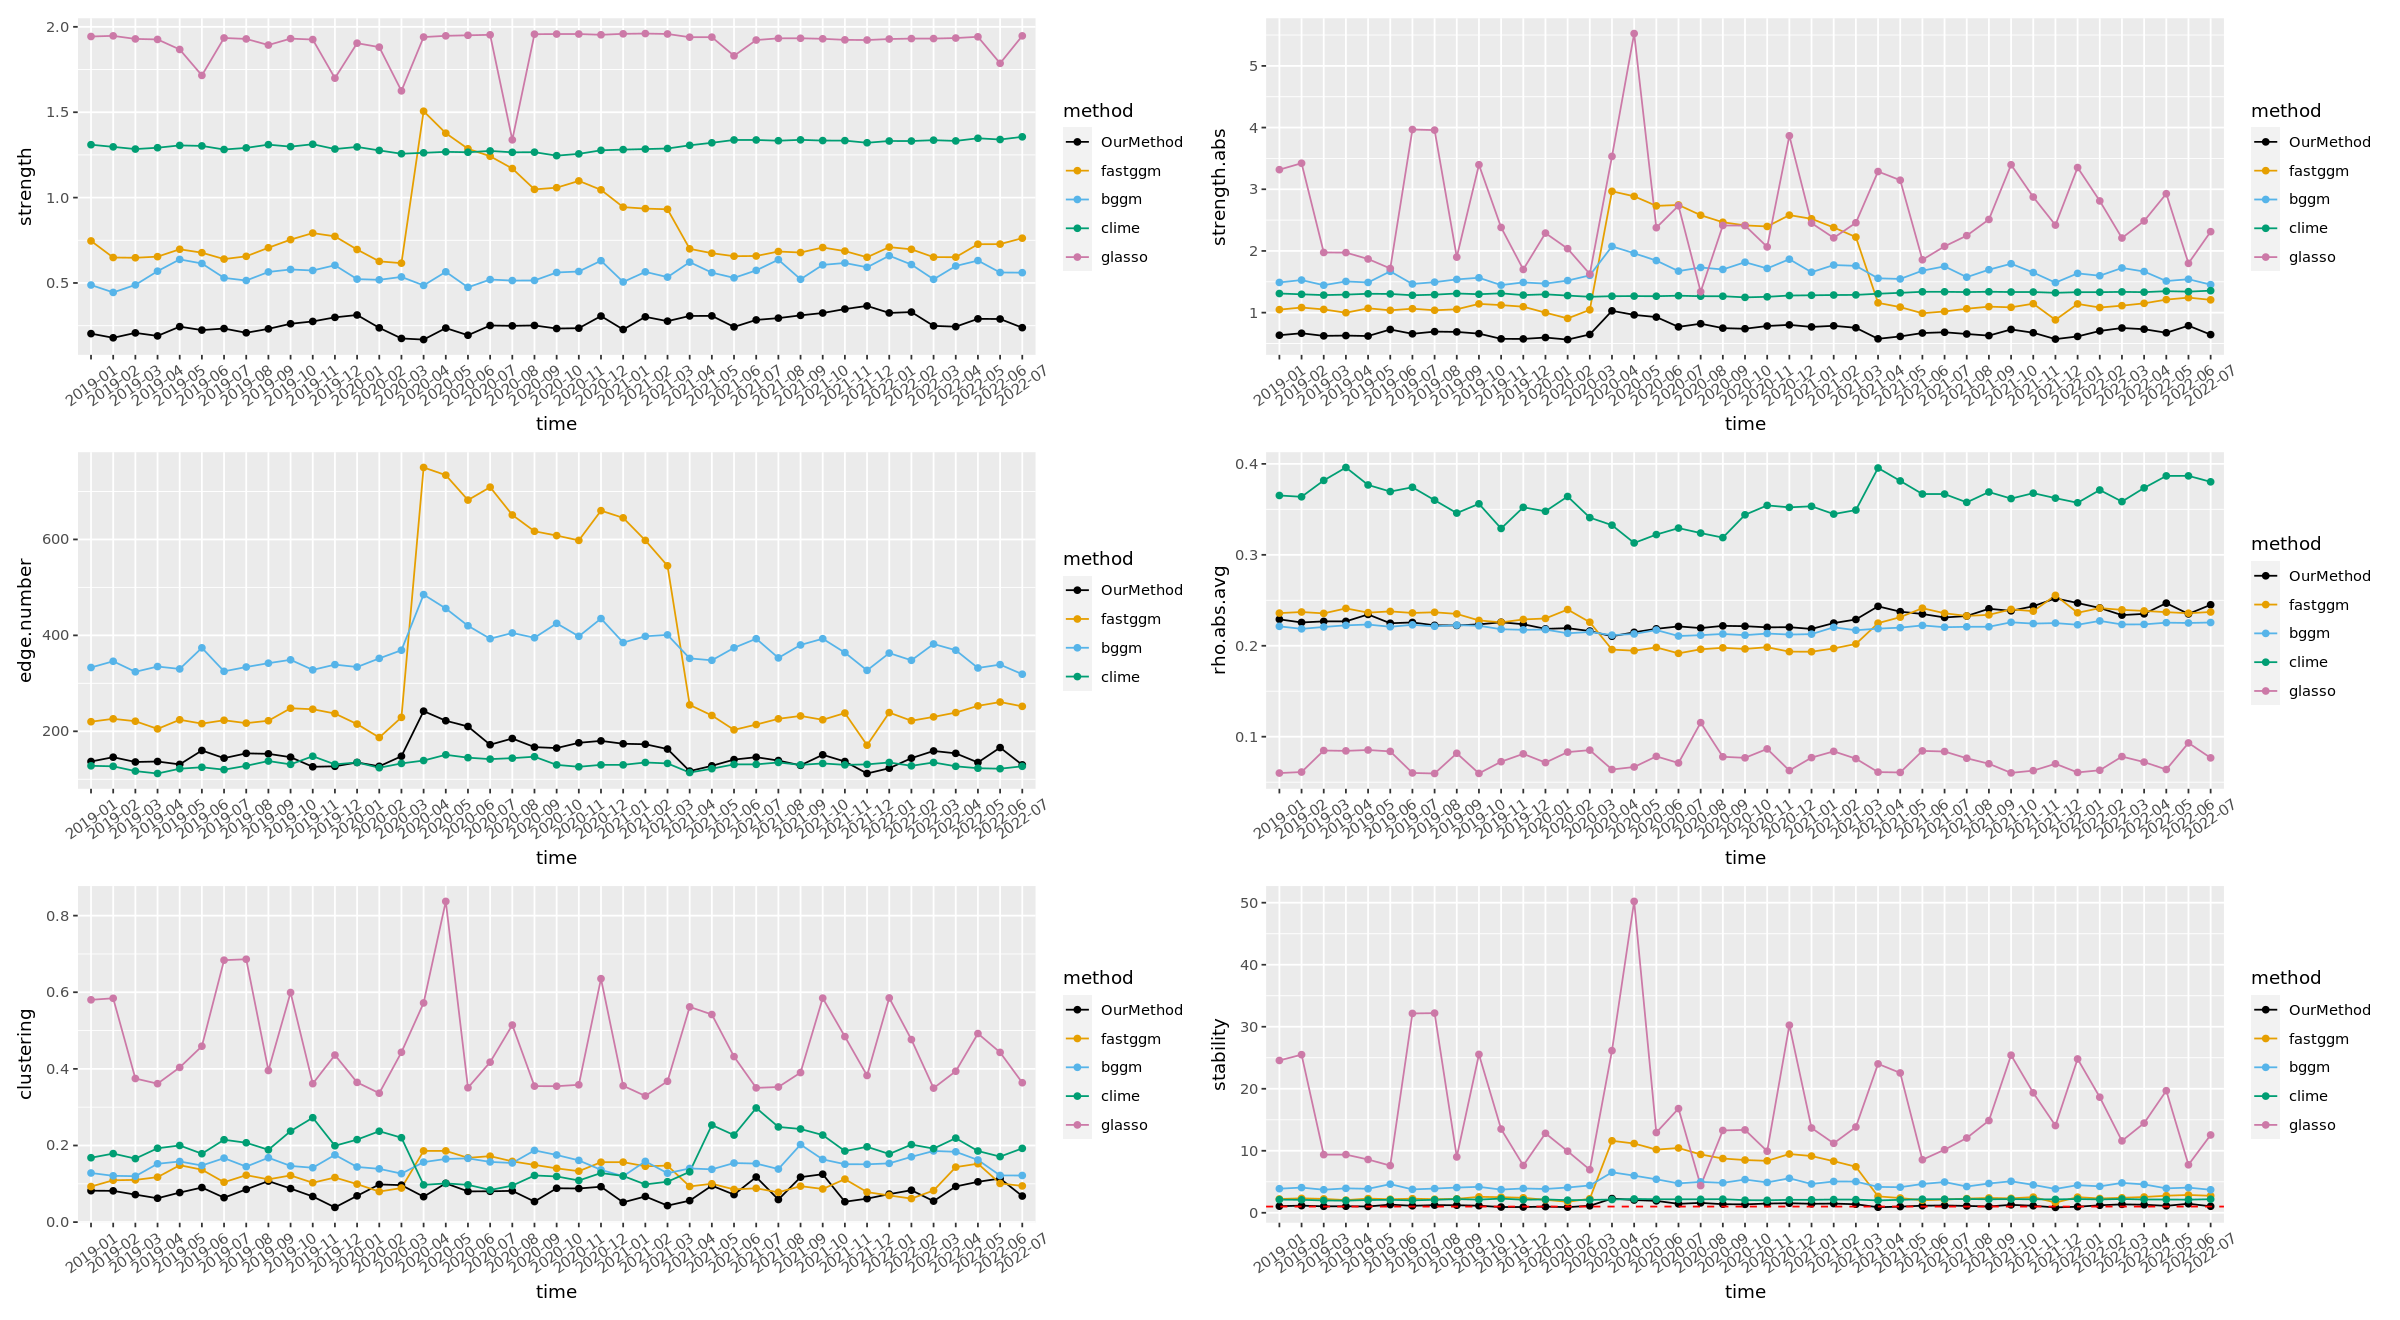

In [206]:
options(repr.plot.width=20, repr.plot.height=11)
ggplot(data=df.strength, aes(x=time, y=strength, group=method, color=method)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#CC79A7"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5))+
ggplot(data=df.strength.abs, aes(x=time, y=strength.abs, group=method, color=method)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#CC79A7"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5)) +
ggplot(data=df.edge, aes(x=time, y=edge.number, group=method, color=method)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5))+
ggplot(data=df.rho.abs.avg, aes(x=time, y=rho.abs.avg, group=method, color=method)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#CC79A7"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5))+
ggplot(data=df.cluster, aes(x=time, y=clustering, group=method, color=method)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#CC79A7"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5))+
ggplot(data=df.stability, aes(x=time, y=stability, group=method, color=method)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#CC79A7"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5))+
  geom_hline(aes(yintercept=1),color='red',linetype='dashed') +
plot_layout(nrow = 3)

In [230]:
df.stability$stability.sqrt = sqrt(df.stability$stability)
df.stability

time,method,stability,stability.sqrt
<fct>,<fct>,<dbl>,<dbl>
2019-01,FLAG,0.7521332,0.8672562
2019-02,FLAG,0.8325652,0.9124501
2019-03,FLAG,0.7706084,0.8778430
2019-04,FLAG,0.7789996,0.8826095
2019-05,FLAG,0.8178975,0.9043769
2019-06,FLAG,0.9733392,0.9865796
2019-07,FLAG,0.8859521,0.9412503
2019-08,FLAG,0.9513588,0.9753762
2019-09,FLAG,0.9130154,0.9555184


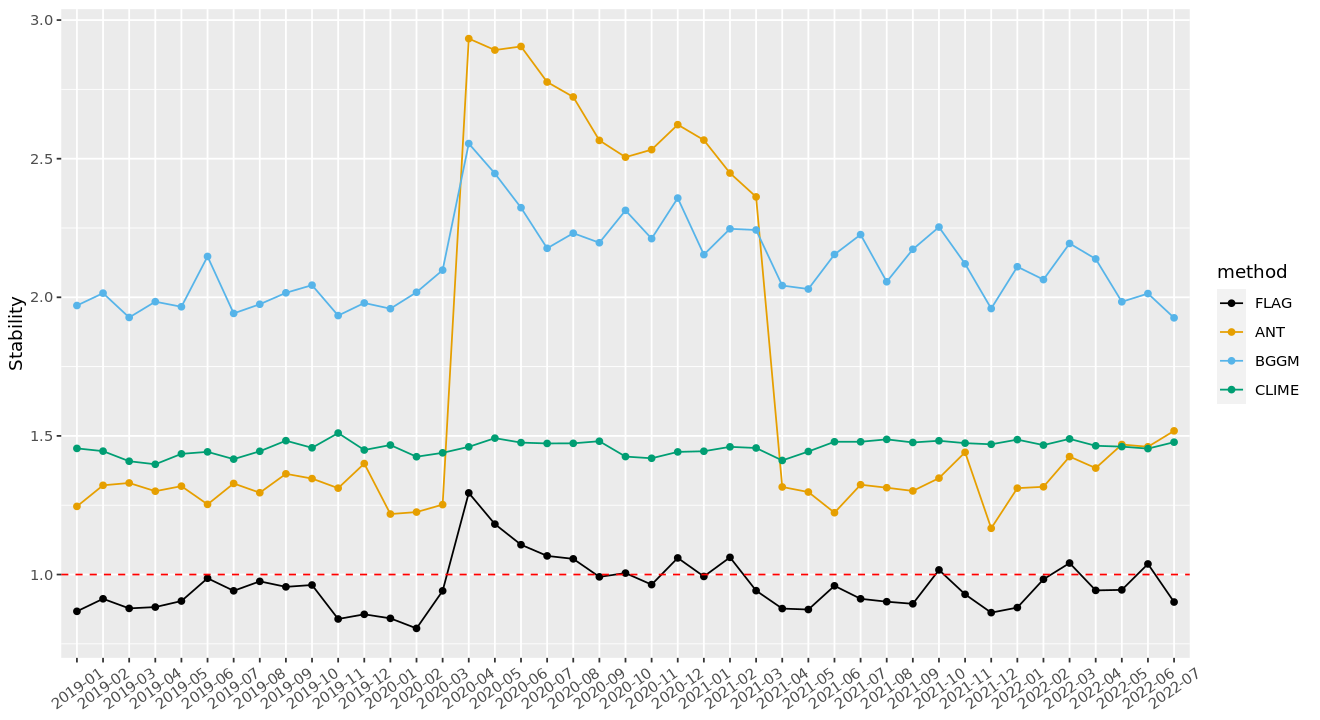

In [232]:
options(repr.plot.width=11, repr.plot.height=6)
ggplot(data=df.stability[which(df.stability$method!='GLASSO'),], aes(x=time, y=stability.sqrt, group=method, color=method)) + geom_line()+ geom_point()+
  scale_colour_manual(values = c("#000000", "#E69F00", "#56B4E9", "#009E73"))+
  theme(axis.text.x = element_text(angle = 35,vjust = 0.5,hjust = 0.5))+
  geom_hline(aes(yintercept=1),color='red',linetype='dashed') + theme(axis.title.x=element_blank()) +ylab("Stability")